## Set up data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
HealthData = pd.read_csv('/Users/janruffner/Desktop/HealthcareFraudCapstoneProject/Data/HealthData.csv', index_col=0)

In [3]:
HealthData.head()

,PotentialFraud2,Majority,sum.BeneID,sum.InscClaimAmtReimbursed,mean.Age,sum.AttendingPhysicians,GenderRatio,sum.Claims,sum.ChronicCond_Alzheimer,sum.ChronicCond_Cancer,...,Majority_44,Majority_45,Majority_46,Majority_47,Majority_49,Majority_50,Majority_51,Majority_52,Majority_53,Majority_54
Provider,,,,,,,,,,,,,,,,,,,,,
PRV51001,0,1,24,104640,84.280000,14,0.640000,25,10,20,...,0,0,0,0,0,0,0,0,0,0
PRV51003,1,1,117,605670,75.553030,44,0.590909,132,76,122,...,0,0,0,0,0,0,0,0,0,0
PRV51004,0,1,138,52170,77.812081,38,0.691275,149,85,133,...,0,0,0,0,0,0,0,0,0,0
PRV51005,1,1,495,278310,76.055030,6,0.560619,1163,738,998,...,0,0,0,0,0,0,0,0,0,0
PRV51007,0,1,58,33710,74.791667,10,0.527778,72,46,60,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X=HealthData.drop(['PotentialFraud2','Majority', 'Majority_1', 
                  'GenderRatio', 'sum.ChronicCond_Heartfailure', 'sum.ChronicCond_stroke','sum.ChronicCond_ObstrPulmonary',
                   'sum.ChronicCond_rheumatoidarthritis', 'sum.ChronicCond_Cancer', 'sum.ChronicCond_Heartfailure', 'sum.ChronicCond_Alzheimer',
                  'sum.ChronicCond_Osteoporasis', 'sum.ChronicCond_Diabetes', 'sum.Claims', 'sum.ClaimsID', 'sum.States', 'BothServices',
                   'Inpatient', 'Outpatient', 'DistinctServices'], axis=1)
y=HealthData[['PotentialFraud2']]

## Define linear regression function

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

In [7]:
import statsmodels.api as sm
def logistic(X, y, print_output=False):
    X2 = sm.add_constant(X)
    X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=.2, stratify=y, random_state=42) 
    reg = sm.Logit(y_train, X_train.astype(float)).fit()
    if print_output:
        print(reg.summary())
    return reg

In [8]:
logistic(X,y,True)

         Current function value: 0.176795
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:        PotentialFraud2   No. Observations:                 4322
Model:                          Logit   Df Residuals:                     4263
Method:                           MLE   Df Model:                           58
Date:                Sun, 18 Apr 2021   Pseudo R-squ.:                  0.4316
Time:                        13:16:08   Log-Likelihood:                -764.11
converged:                      False   LL-Null:                       -1344.3
Covariance Type:            nonrobust   LLR p-value:                8.983e-205
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -2.1340      1.671     -1.277      0.202      -5.410       1.142
sum.BeneID       

/Users/janruffner/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y, random_state=42) 
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/janruffner/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [10]:
y_pred = logreg.predict(X_train)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)))

Accuracy of logistic regression classifier on train set: 0.93


In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred)
print(confusion_matrix)

[[3863   54]
 [ 233  172]]


In [12]:
logreg.score(X_test, y_test)

0.940795559666975

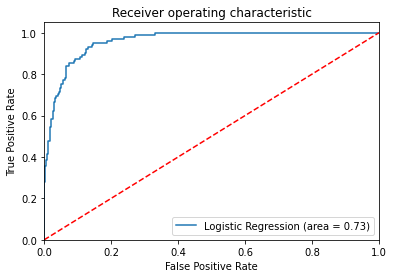

In [13]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()